## XMAC02 - Prova Bimestral 1

Nome:

Nro Matrícula: 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson, stats, binomtest
from statsmodels.stats import weightstats, proportion

C:\Users\Laercio\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Questão 1 \
Utilizando o dataset "house_prices.csv", retire os imóveis que não tem preço (Price == NaN). Em seguida, filtre os imóveis localizados na Regionname "Eastern Metropolitan" e responda os itens a seguir: 

a) Informe a média, a mediana e o desvio padrão do preço das casas de 3 quartos (Rooms = 3). 

b) Gere um boxplot do preço do imóvel por número de quartos. Limite o número de quartos a no máximo 6.

In [2]:
df = pd.read_csv("house_prices.csv")
df = df.dropna(subset=['Price'])
df2 = df[df['Regionname']=='Eastern Metropolitan']
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
44,Bayswater North,8 Wattle Rd,4,h,880000.0,S,Philip,1/04/2017,3153,Eastern Metropolitan,3598,23.2,Maroondah City Council
50,Bellfield,1/15 Toohey St,3,u,675000.0,SP,Nelson,1/04/2017,3081,Eastern Metropolitan,790,8.8,Banyule City Council
64,Blackburn,28 Elmhurst Rd,4,h,1200000.0,PI,Noel,1/04/2017,3130,Eastern Metropolitan,5713,13.4,Whitehorse City Council
65,Blackburn,16 Peacedale Gr,4,h,1410000.0,S,Noel,1/04/2017,3130,Eastern Metropolitan,5713,13.4,Whitehorse City Council
66,Blackburn,4 Rosalind Cr,3,h,1110000.0,S,Barry,1/04/2017,3130,Eastern Metropolitan,5713,13.4,Whitehorse City Council


In [3]:
df3 = df2[df2['Rooms']==3]
print(df3['Price'].mean())
print(df3['Price'].median())
print(df3['Price'].std())

978272.7891156463
907000.0
303208.69123224745


<Axes: title={'center': 'Price'}, xlabel='Rooms'>

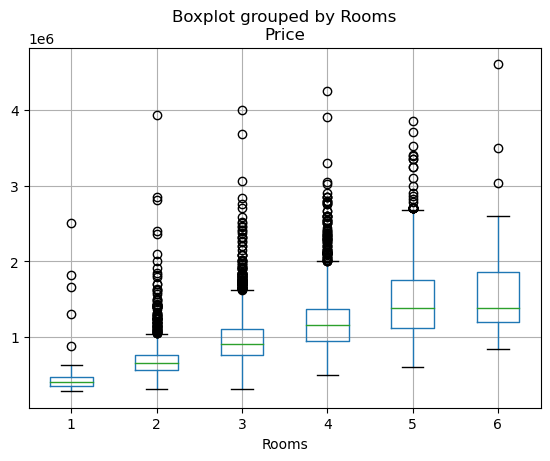

In [4]:
df3 = df2[df2['Rooms']<=6]
df3.boxplot(by ='Rooms', column =['Price'])

Questão 2 \
Considere o dataset "house_prices.csv". Plote um gráfico de pizza que mostre a porcentagem de imóveis por região (Regionname) \
Dica: Use o campo Propertycount.

                            Propertycount
Regionname                               
Eastern Metropolitan             51234286
Eastern Victoria                  3442518
Northern Metropolitan           128115894
Northern Victoria                 2010586
South-Eastern Metropolitan       27139949
Southern Metropolitan            92900915
Western Metropolitan             60875077
Western Victoria                   744222


C:\Users\Laercio\AppData\Local\Temp\ipykernel_13964\817708175.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  result = df[['Regionname', 'Propertycount']].groupby('Regionname').aggregate(sum)


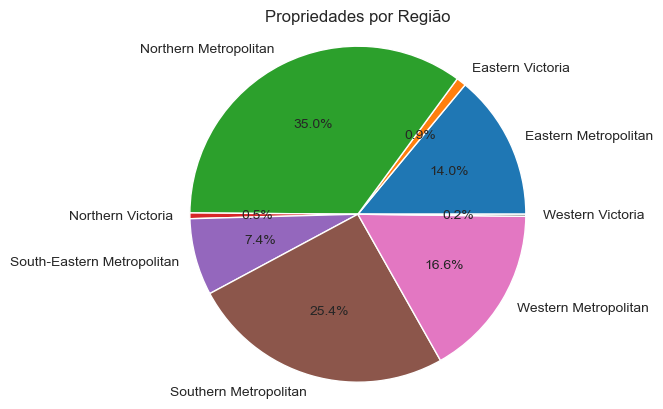

In [5]:
result = df[['Regionname', 'Propertycount']].groupby('Regionname').aggregate(sum)
print(result)
sizes = result['Propertycount']
#labels = ['Eastern Metropolitan','Eastern Victoria','Northern Metropolitan','Northern Victoria','South-Eastern Metropolitan','Southern Metropolitan','Western Metropolitan','Western Victoria']
labels = result.index
sns.set_style("darkgrid")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Propriedades por Região')
plt.axis('equal')
plt.show()

## OU

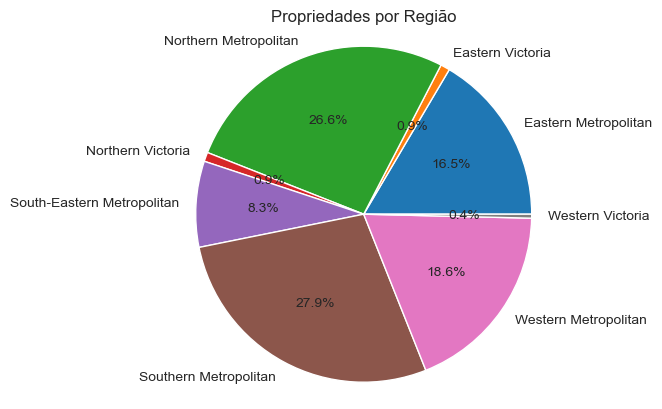

In [6]:
df2 = pd.read_csv('house_prices.csv')
sizes = df2.groupby('Regionname')['Regionname'].count()
#labels = ['Eastern Metropolitan','Eastern Victoria','Northern Metropolitan','Northern Victoria','South-Eastern Metropolitan','Southern Metropolitan','Western Metropolitan','Western Victoria']
labels = sizes.index
sns.set_style("darkgrid")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Propriedades por Região')
plt.axis('equal')
plt.show()

Questão 3 \
O dataset "insurance.csv" exibe dados de seguro saúde dos EUA (healsh insurance). \
bmi = body mass index (IMC - índice de massa corporal). \
charges = valores cobrados do seguro saúde.

Plote um gráfico que mostre o valor médio pago (charges médio) por fumantes e não fumantes das 4 regiões existentes no dataset.

In [7]:
df = pd.read_csv('insurance.csv')
charges_reg_sex = pd.crosstab(df['region'], df['smoker'], values=df['charges'], aggfunc=np.mean)
charges_reg_sex

C:\Users\Laercio\AppData\Local\Temp\ipykernel_13964\3167518155.py:2: FutureWarning: The provided callable <function mean at 0x0000021891A51360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  charges_reg_sex = pd.crosstab(df['region'], df['smoker'], values=df['charges'], aggfunc=np.mean)


smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


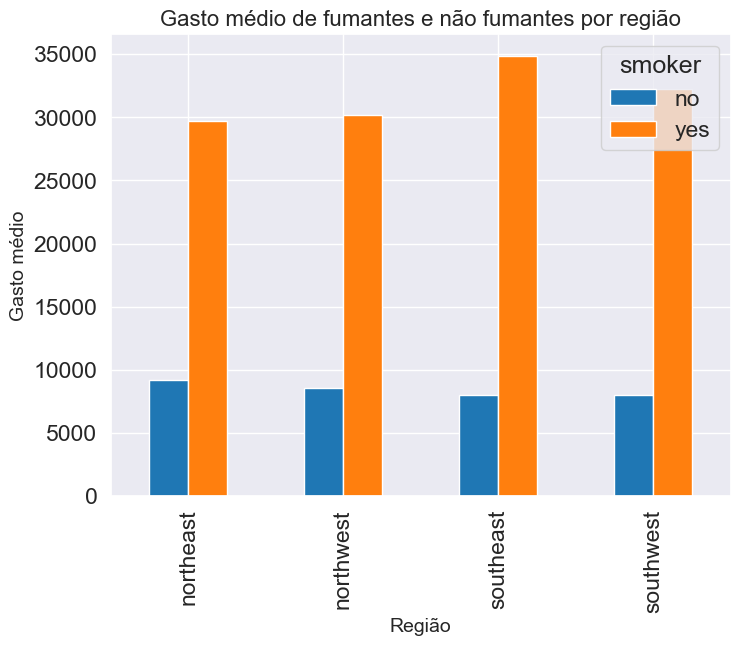

In [8]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
charges_reg_sex.plot(kind="bar",stacked=False)
plt.title("Gasto médio de fumantes e não fumantes por região")
plt.ylabel("Gasto médio")
plt.xlabel("Região")
plt.show()

Questão 4 \
Um digitador tem uma taxa de erro média de 0.1% de palavras digitadas. Considerando que a taxa de erros segue uma Distribuição de Poisson: \
a) Qual a probabilidade que um texto contendo 2000 palavras seja digitado sem nenhum erro? \
b) Qual a probabilidade que um texto contendo 3000 palavras apresente no mínimo 3 e não mais que 5 erros


In [9]:
# 2000 x 0.001 = 2
poisson.pmf(0, 2)

0.1353352832366127

In [10]:
vet = np.arange(3, 6)
vet2 = poisson.pmf(vet, 3)
print(vet2)
print(sum(vet2))

[0.22404181 0.16803136 0.10081881]
0.49289197684185315


Questão 5 \
Pesquisas indicaram que 75% dos eleitores de uma cidade são alfabetizados. Entre 16 eleitores dessa cidade, determine a probabilidade de: \
a) no máximo 1 ser analfabeto; \
b) 3 ou mais serem analfabetos; \
c) pelo menos 1 ser analfabeto.

In [11]:
binom.cdf(1, 16, 0.25)

0.0634764397982508

In [12]:
binom.sf(2, 16, 0.25)

0.8028889501001686

In [13]:
binom.sf(0, 16, 0.25)

0.9899774042423815

Questão 6 \
100 alunos de uma classe realizaram uma prova e a média da turma foi 5,8 com desvio padrão 2,5. Assumindo que as notas da turma seguem uma distribuição Normal de probabilidade, responda as questões a seguir. \
a) Quantos alunos tiraram menos que 6,0? \
b) Quantos alunos tiraram entre 6,0 e 8,0? \
c) Quantos alunos tiraram mais que 9,0?


In [14]:
prob =  norm.cdf(6, 5.8, 2.5) - norm.pdf(6, 5.8, 2.5)
100 * prob

37.281428980934386

In [15]:
prob =  norm.sf(6, 5.8, 2.5) - norm.sf(8, 5.8, 2.5)
100 * prob

27.868897320930046

In [16]:
prob =  norm.sf(9, 5.8, 2.5)
100 * prob

10.027256795444206

Questão 7 \
Um digitador tem uma taxa de erro média de 0.1% de palavras digitadas. Considerando que a taxa de erros segue uma Distribuição de Poisson: \
a) Qual a probabilidade que um texto contendo 2000 palavras seja digitado sem nenhum erro? \
b) Qual a probabilidade que um texto contendo 3000 palavras apresente no mínimo 3 e não mais que 5 erros?

## Anulada

Questão 8 \
A resistência média à ruptura das hastes de aço deve ser de pelo menos 35.000 psi. Com base nas informações históricas, o desvio padrão da resistência à ruptura é de 1.500 psi. Decidiu-se realizar um teste de hipótese com uma amostra aleatória de 4 hastes, para decidir se o lote dessas amostras deve ser comprado. Os valores obsevados na amostra foram os seguintes: peça um: 32.000 psi, peça dois: 36.000 psi, peça três: 34.000 psi e peça quatro: 34.500 psi. Num nível de confiança de 95%, o lote deve ser considerado aprovado para compra?
Informe: \
a) O teste realizado; \
b) As hipóteses nula a alternativa; e \
c) O resultado do teste.

H0: μ >= 35000 \
H0: μ < 35000

In [17]:
valores = [32000, 36000, 34000, 34500]
weightstats.ztest(x1 = valores, value = 35000, alternative='larger')

(-1.0593098718411684, 0.8552706597164978)

Como p_value é maior 0.05, falhamos em rejeitar a hipótese nula, portanto o lote deve ser aprovado para compra.

Questão 9 \
Um jogador ganha 48% das mãos que joga, mas sente que está numa sequência de derrotas recentemente, ganhando menos mãos do que o normal. Ele então analisa uma amostra aleatória de 40 de suas mãos recentes e encontra 18 mãos vencedoras. Ele deve concluir que está mesmo numa sequência negativa de derrotas? Analise com confiança de 90%.

H0 : p ≥ 0.48 \
Ha : p < 0.48

In [18]:
binomtest(18, 40, p=0.48, alternative='less')

BinomTestResult(k=18, n=40, alternative='less', statistic=0.45, pvalue=0.4133055210421629)

Como pvalue = 0.41 é bem maior que alpha = 0.1, falhamos em rejeitar a hipótese nula. Portanto o jogador deve concluir que não está numa sequência negativa de derrotas.

Questão 10 \
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão de 15 ml. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,08 e duas caudas. \
a) Obtenha o Z crítico para esse teste. \
b) Considere que tenha sido tomada uma única amostra contendo 726 ml. Obtenha o Z calc e informe o resultado do teste. \
c) Considere que tenham sido tomadas 4 amostras e a média obtida foi 736 ml. Obtenha o Z calc e informe o resultado do teste.

a) Zcritico = 1,75 \
b) Zcal = 1,6 -- validar hipótese nula \
c) Zcal = 1,86 -- rejeitar hipótese nula

In [19]:
print(norm.ppf(0.04))
print(norm.isf(0.04))

-1.75068607125217
1.75068607125217


In [20]:
z_calc = (726-750)/15
z_calc

-1.6

In [21]:
z_calc = (736-750)/15*np.sqrt(4)
z_calc

-1.8666666666666667